## Exploratory Data Analysis

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import itertools
cc = pd.read_csv("D:/DIGITALENT/BLACK FRIDAY PROJECT KAGGLE/2. Prepared Data/BlackFriday.csv")

In [2]:
cc.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


There are users who did not purchase 2 products or more and only buy 1 product in one time purchase. 
It is identified that Product_Category_2 and Product_Category_3 are float64 and there is no non-null even though in the row before we can see clearly there are missing values in those columns.

In [44]:
cc['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [5]:
cc.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [6]:
cc['Product_Category_1'].value_counts(normalize=True)

5     0.276411
1     0.257364
8     0.208588
11    0.044570
2     0.043713
6     0.037509
3     0.036923
4     0.021517
16    0.018038
15    0.011539
13    0.010119
10    0.009361
12    0.007208
7     0.006823
18    0.005720
14    0.002790
17    0.001055
9     0.000752
Name: Product_Category_1, dtype: float64

There are 27% people buy product in category 5 as the first product. Only 0.07% people buy product in category 9 as the first product they buy.

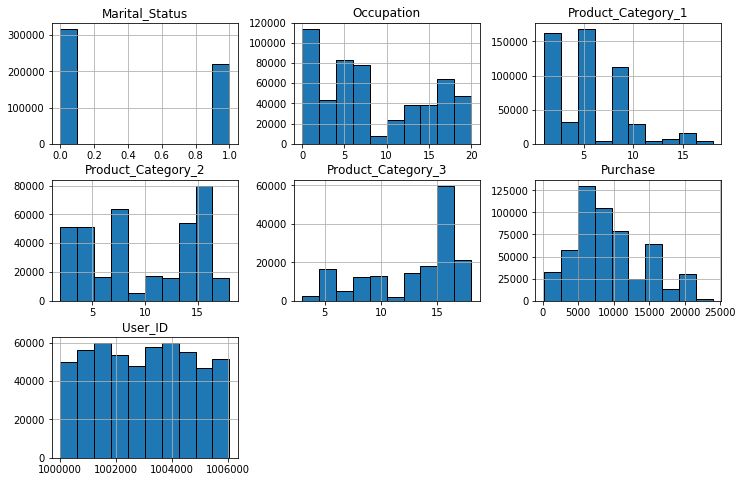

In [7]:
cc.hist(edgecolor='black', linewidth=1)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

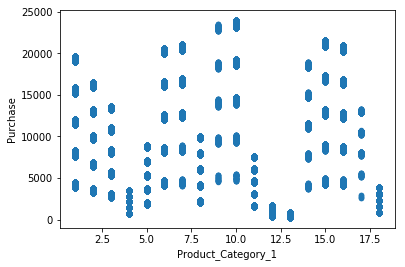

In [17]:
cc.plot.scatter(x='Product_Category_1', y='Purchase')

This interesting pattern perhaps can be use as clustering base.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000007C08B0B780>,
      dtype=object)

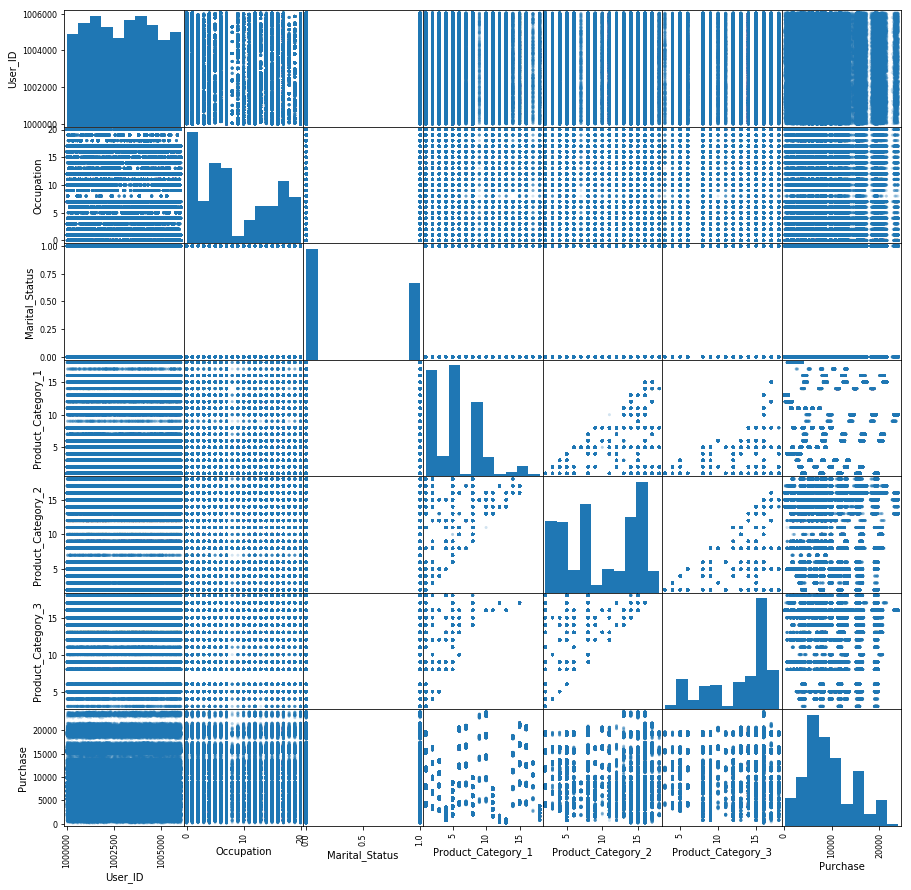

In [18]:
pd.plotting.scatter_matrix(cc, alpha=0.2, figsize=(15,15))

There are 3 Product Categories, which can further be a base of association.

In [19]:
pd.crosstab(cc.Marital_Status, cc.Occupation, margins = True)

Occupation,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,All
Marital_Status,,,,,,,,,,,,,,,,,,,,,
0,39664,24065,13906,10202,51723,7473,10983,32693,672,3001,...,16208,3553,15772,6483,13042,22243,3549,6853,16843,317817
1,28456,21906,11939,7164,19139,4512,8839,25113,852,3152,...,14215,3995,10940,5329,11748,16847,2976,1499,16067,219760
All,68120,45971,25845,17366,70862,11985,19822,57806,1524,6153,...,30423,7548,26712,11812,24790,39090,6525,8352,32910,537577


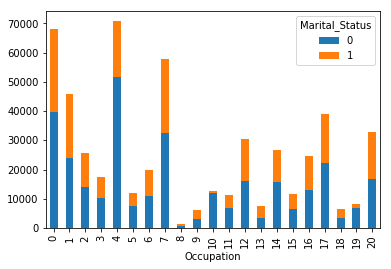

In [24]:
temp = pd.crosstab(cc.Occupation, cc.Marital_Status)
temp.plot.bar(stacked=True)

People who buy on Black Friday is mostly unmarried. The highest number of buyers come from people who work as 4 and most of them are unmarried. Furthermore, other occupations with high number of buyer are 0 and 7. Most of them are unmarried also.

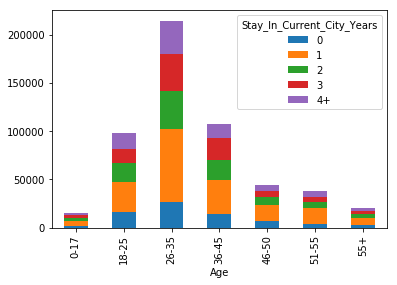

In [43]:
temp = pd.crosstab(cc.Age,cc.Stay_In_Current_City_Years)
temp.plot.bar(stacked=True)

People who buy on Black Friday is mostly in the age between 25-35. The highest number of buyers come from people who already live in the current city for a year.

## Chi-test between Gender and Marital Status

In [29]:
cc_tab = pd.crosstab(cc.Marital_Status, cc.Gender, margins = True)
cc_tab

Gender,F,M,All
Marital_Status,,,
0,76974,240843,317817
1,55223,164537,219760
All,132197,405380,537577


In [31]:
# make matrix observed
cc_tab.columns = ["F","M","row_totals"]
cc_tab.index = ["0","1","col_totals"]

observed = cc_tab.iloc[0:2,0:2]   # Get table without totals for later use
observed

,F,M
0,76974,240843
1,55223,164537


In [33]:
import numpy as np
expected =  np.outer(cc_tab["row_totals"][0:2],
                     cc_tab.loc["col_totals"][0:2]) / 400
expected = pd.DataFrame(expected)
expected.columns = ["F","M"]
expected.index = ["0","1"]
expected

,F,M
0,1.050361e+08,3.220916e+08
1,7.262903e+07,2.227158e+08


In [34]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

721397823.3655924


In [37]:
import scipy.stats as stats
# Find critical value
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 1)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=1)
print("P value")
print(p_value)

Critical value
3.841458820694124
P value
0.0


The value chi_squared_stat > Critical value, so they are not independent variables (has correlation).

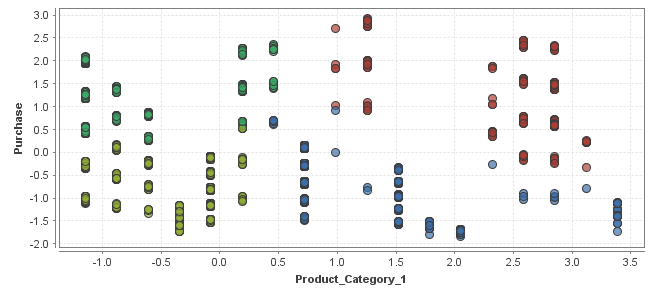

Above is Black Friday Clustering with Rapidminer between Purchase and Product Category 1, with dBi score 0.776

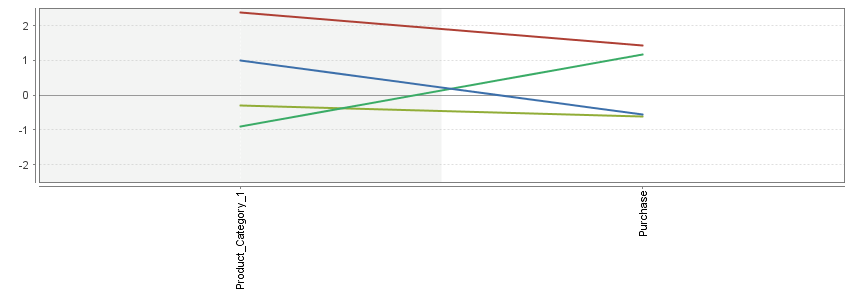

Above is K-Means Centroid Chart